# Lab 4: Correlations and stationarity - Marcin Kuźniar

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('IBM.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,120.160004,122.209999,119.599998,121.510002,113.363281,4261700
1,2022-10-04,122.800003,125.650002,122.519997,125.500000,117.085762,4566100
2,2022-10-05,124.709999,126.459999,124.230003,125.739998,117.309669,3212900
3,2022-10-06,124.879997,125.300003,121.769997,122.230003,114.035011,5074600
4,2022-10-07,121.500000,121.800003,118.070000,118.820000,110.853622,4499700


In [9]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,120.160004,122.209999,119.599998,121.510002,113.363281,4261700
2022-10-04,122.800003,125.650002,122.519997,125.500000,117.085762,4566100
2022-10-05,124.709999,126.459999,124.230003,125.739998,117.309669,3212900
2022-10-06,124.879997,125.300003,121.769997,122.230003,114.035011,5074600
2022-10-07,121.500000,121.800003,118.070000,118.820000,110.853622,4499700


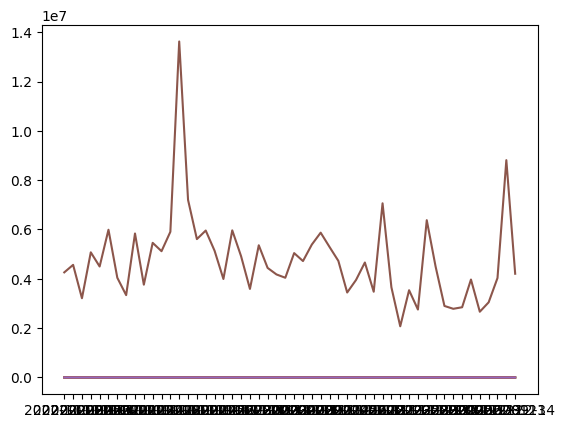

In [10]:
plt.plot(df)

# Autocorrelation plot

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig=plot_acf(df['Close'], lags=51, zero=True)
plt.ylim([-0.50,1.05])

ModuleNotFoundError: No module named 'statsmodels'

# Ljung-Box test

In [12]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(df['Close'], lags=20, return_df=True) 

ModuleNotFoundError: No module named 'statsmodels'

#  Check the stationarity of the time series with the Augmented Dickey-Fuller test

In [37]:
from statsmodels.tsa.stattools import adfuller, kpss

adfuller(df['Close'])

(-0.9398265150729506,
 0.7745742973095588,
 0,
 51,
 {'1%': -3.5656240522121956,
  '5%': -2.920142229157715,
  '10%': -2.598014675124952},
 155.18453180208093)

# Difference the time series and repeat calculations

In [40]:
df['dif1']=df['Close'].diff()
df.head()

,Open,High,Low,Close,Adj Close,Volume,dif1
Date,,,,,,,
2022-10-03,120.160004,122.209999,119.599998,121.510002,113.363281,4261700,NaN
2022-10-04,122.800003,125.650002,122.519997,125.500000,117.085762,4566100,3.989998
2022-10-05,124.709999,126.459999,124.230003,125.739998,117.309669,3212900,0.239998
2022-10-06,124.879997,125.300003,121.769997,122.230003,114.035011,5074600,-3.509995
2022-10-07,121.500000,121.800003,118.070000,118.820000,110.853622,4499700,-3.410003


<Axes: xlabel='Date'>

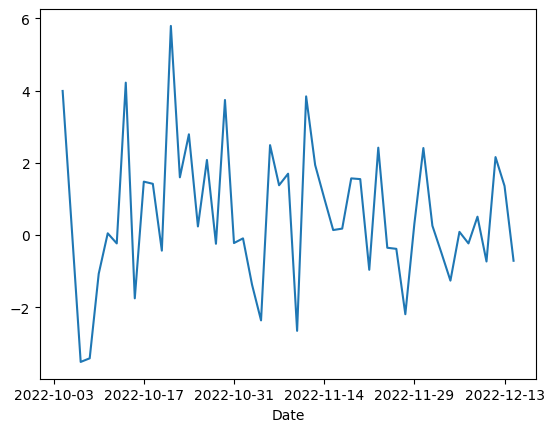

In [42]:
df['dif1'].plot()

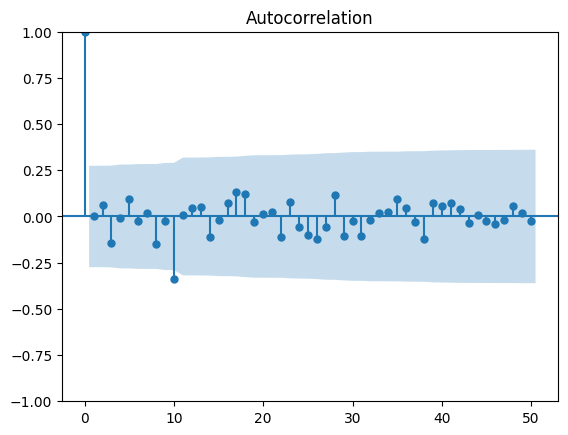

In [46]:
fig = plot_acf(df['dif1'].dropna(),lags=50)

In [72]:
df['dif1_12'] = df['dif1'].diff(1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,dif1,dif1_12
Date,,,,,,,,
2022-10-03,120.160004,122.209999,119.599998,121.510002,113.363281,4261700,NaN,NaN
2022-10-04,122.800003,125.650002,122.519997,125.500000,117.085762,4566100,3.989998,NaN
2022-10-05,124.709999,126.459999,124.230003,125.739998,117.309669,3212900,0.239998,-3.750000
2022-10-06,124.879997,125.300003,121.769997,122.230003,114.035011,5074600,-3.509995,-3.749993
2022-10-07,121.500000,121.800003,118.070000,118.820000,110.853622,4499700,-3.410003,0.099992


<Axes: xlabel='Date'>

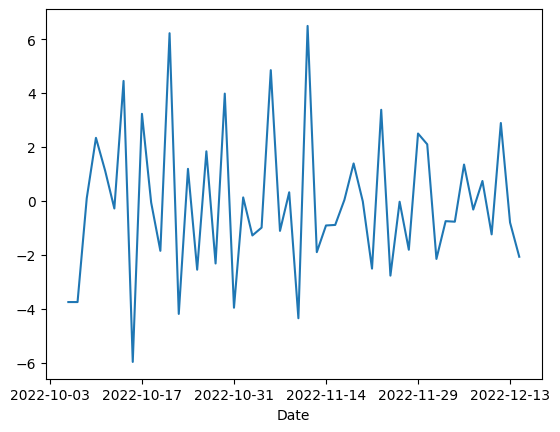

In [73]:
df['dif1_12'].plot()

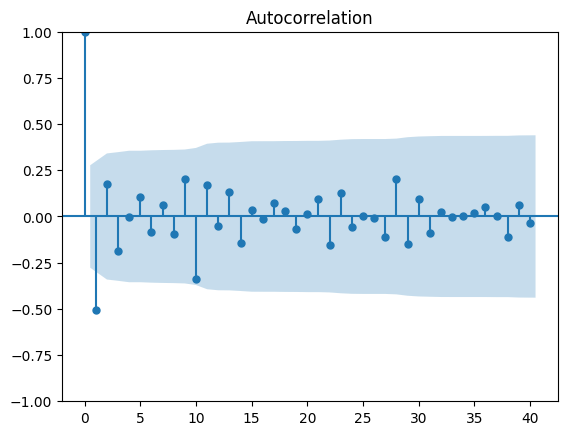

In [74]:
fig = plot_acf(df['dif1_12'].dropna(),lags=40)